In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
# Reading CSV files
file_path = "bank-full.csv"
data = pd.read_csv(file_path)
#I'll define an object df and assign data to df, so that I can differentiate between them, or back them up.
df = data

In [2]:
#See the data types of columns in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [3]:
#Display categorical variables 
df.select_dtypes(include=["object","bool"]).describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [4]:
#Display continuous variable
pd.options.display.float_format = '{:.2f}'.format 
df.select_dtypes(include=["int64","float64"]).describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00
mean,40.94,1362.27,15.81,258.16,2.76,40.20,0.58
std,10.62,3044.77,8.32,257.53,3.10,100.13,2.30
min,18.00,-8019.00,1.00,0.00,1.00,-1.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,-1.00,0.00
50%,39.00,448.00,16.00,180.00,2.00,-1.00,0.00
75%,48.00,1428.00,21.00,319.00,3.00,-1.00,0.00
max,95.00,102127.00,31.00,4918.00,63.00,871.00,275.00


In [5]:
# Automatically create dummy variables for categorical columns
dummy_df = pd.get_dummies(df, drop_first=True)
dummy_df = dummy_df.astype(int)
dummy_df = dummy_df.apply(pd.to_numeric, errors='coerce')
dummy_df = dummy_df.rename(columns={'y_yes': 'y'})
dummy_df

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,1,0,0,0,1,0,1
45209,57,668,17,508,4,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


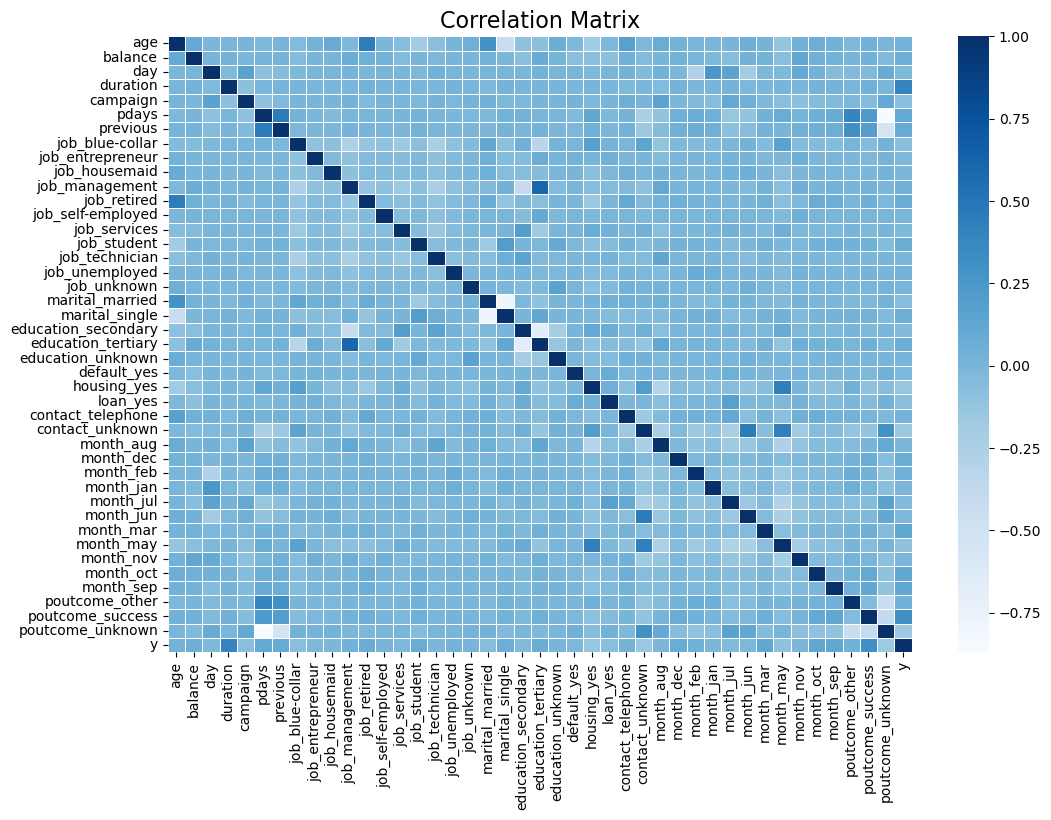

In [6]:
#Display the correlation with heatmap
plt.figure(figsize=(12, 8))  # Adjust figure size
sns.heatmap(
    dummy_df.select_dtypes(include=["int32","float64"]).corr(numeric_only=True), 
    cmap="Blues",  # Color map
    linewidths=0.5,  # Cell spacing
)

# Add title and labels
plt.title("Correlation Matrix", fontsize=16)
#plt.savefig('image/correlation_matrix.png', dpi=300, bbox_inches='tight')  # Save as PNG with high resolution
plt.show()

In [7]:
# Compute the correlation matrix
corr_matrix = dummy_df.corr()

# Create a mask for correlations > 0.4 (absolute)
corr_matrix_abs = corr_matrix.abs()
mask = (corr_matrix_abs > 0.4) & (corr_matrix_abs != 1)  # Exclude self-correlation (1)

# Identify columns to drop based on high correlation
# Drop one of each pair of columns that are highly correlated
columns_to_drop = set()  # Set to avoid duplicates

# Iterate over the correlation matrix to find the columns to drop
for row in corr_matrix.columns:
    for col in corr_matrix.columns:
        if row != col and mask.loc[row, col]:
            # Drop the column with the lower index (or any other strategy, like variance, if needed)
            columns_to_drop.add(col)

# Select remaining features for modeling
# Drop the identified columns from the original DataFrame
final_features = [col for col in dummy_df.columns if col not in columns_to_drop]

# Print the selected features for modeling
model_data = dummy_df[final_features]
model_data

,balance,day,duration,campaign,job_blue-collar,job_entrepreneur,job_housemaid,job_self-employed,job_services,job_student,...,month_dec,month_feb,month_jan,month_jul,month_mar,month_nov,month_oct,month_sep,poutcome_success,y
0,2143,5,261,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,29,5,151,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,5,76,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1506,5,92,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,5,198,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,825,17,977,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
45207,1729,17,456,2,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
45208,5715,17,1127,5,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
45209,668,17,508,4,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


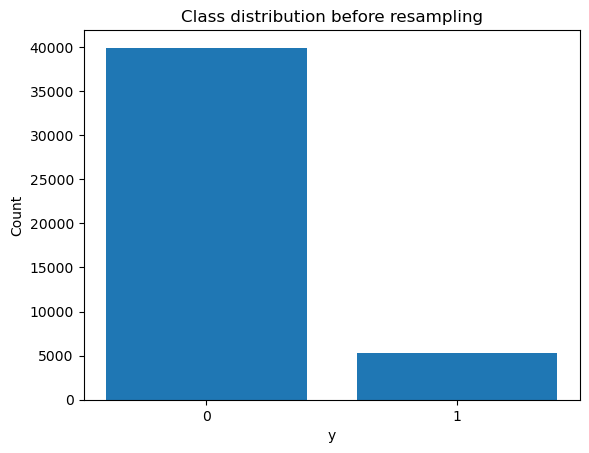

y
0    39922
1     5289
Name: count, dtype: int64


In [8]:
# Convert Target column to numeric data
model_data = model_data.apply(pd.to_numeric, errors='coerce')

# Count the number of both positive and negative decison variables
y_count = model_data['y'].value_counts()
plt.bar(y_count.index, y_count.values)
plt.xlabel('y')
plt.ylabel('Count')
plt.title('Class distribution before resampling')
plt.xticks(y_count.index, ['0', '1'])
#plt.savefig('image/distribution_original.png', dpi=300, bbox_inches='tight')  # Save as PNG with high resolution
plt.show()
print(y_count)

In [9]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Define features and target
X = model_data.drop(columns=['y']) 
y = model_data['y']

# Split into 80% training and 20% (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the 20% (X_temp, y_temp) into 50% validation and 50% test, which is 10% each of the original data
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/2, random_state=42)

# Apply SMOTE to the training data (oversample the minority class)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE on training data
print("Resampled class distribution in y_train:", y_train_resampled.value_counts())

Resampled class distribution in y_train: y
0    31970
1    31970
Name: count, dtype: int64


Validation Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.86      0.89      4003
           1       0.31      0.49      0.38       518

    accuracy                           0.81      4521
   macro avg       0.62      0.67      0.63      4521
weighted avg       0.86      0.81      0.83      4521



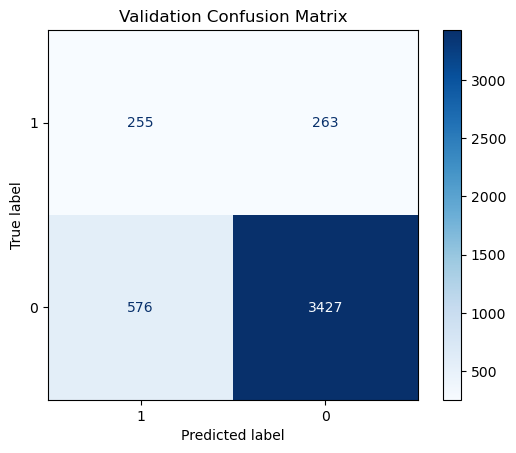

Test Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.86      0.89      3949
           1       0.36      0.54      0.43       573

    accuracy                           0.82      4522
   macro avg       0.65      0.70      0.66      4522
weighted avg       0.86      0.82      0.84      4522



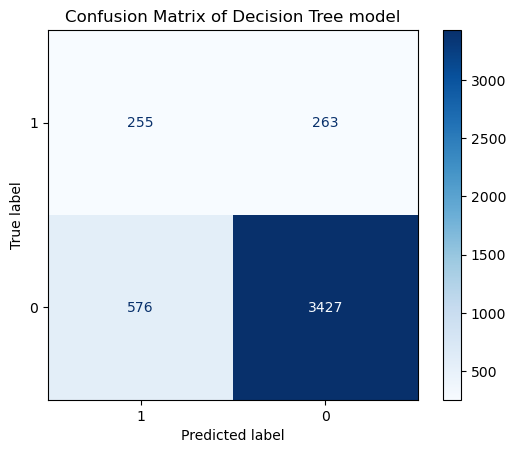

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_resampled, y_train_resampled)

# Evaluate on the validation set
y_val_pred = dt_model.predict(X_val)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Confusion matrix for validation
confusion_matrix_valid = confusion_matrix(y_val, y_val_pred, labels=[1, 0])
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_valid, display_labels=[1, 0])
cm_display.plot(cmap='Blues')
plt.title("Validation Confusion Matrix")
plt.show()

# Evaluate on the test set
y_test_pred = dt_model.predict(X_test)
report = classification_report(y_test, y_test_pred)
print("Test Classification Report:")
print(report)

# Save to text file
with open("decision_tree_classification_report.txt", "w") as f:
    f.write(report)

# Confusion matrix for the test set
confusion_matrix_test = confusion_matrix(y_val, y_val_pred, labels=[1, 0])
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_test, display_labels=[1, 0])
cm_display.plot(cmap='Blues')
plt.title("Confusion Matrix of Decision Tree model")
plt.savefig('image/confusion_matrix_decision_tree.png', dpi=300, bbox_inches='tight')
plt.show()

AUC (Test Set): 0.7003


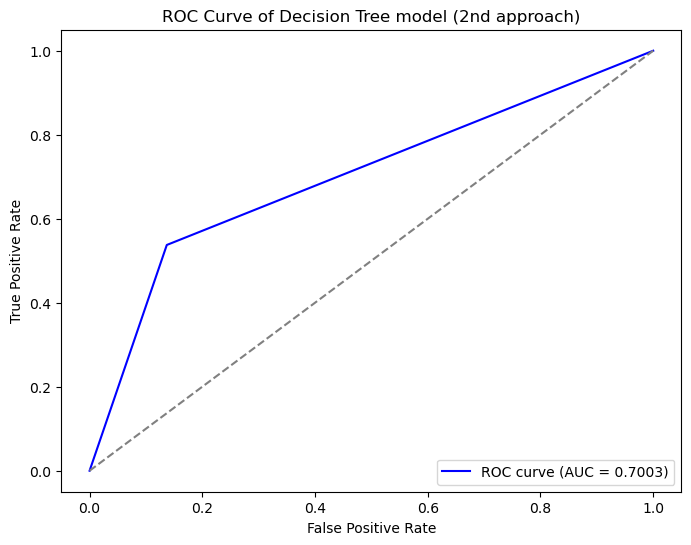

In [11]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for the validation set
y_test_prob = dt_model.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class (class 1)

# Calculate AUC for the test set
auc_test = roc_auc_score(y_test, y_test_prob)
print(f"AUC (Test Set): {auc_test:.4f}")

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label = f'ROC curve (AUC = {auc_test:.4f})', color='b')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line representing random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Decision Tree model (2nd approach)')
plt.legend(loc='lower right')
plt.savefig('image/ROC_decision_tree.png', dpi=300, bbox_inches='tight')  # Save as PNG with high resolution
plt.show()

In [12]:
accuracy = metrics.accuracy_score(y_test, y_test_pred)
accuracy

0.8217602830605927